In [ ]:
import pandas

from bessie.backtests import BacktestInputData, run_backtest, BatterySpec
from bessie.core import Region
from bessie.strategies import (
    ForecastBaseline,
    QuantilePicker,
    ClarabelOptimised,
)
from bessie import analysis


start = pandas.Timestamp("2022-01-01 00:00:00")
end = pandas.Timestamp("2022-02-01 00:00:00")

battery = BatterySpec(
    e_max=50,
    p_max=50,
    deg=0.00001,
    eta_chg=0.9,
    eta_dchg=0.95,
)
data = BacktestInputData.from_aemo_forecasts(
    start=start,
    end=end,
    region=Region.NSW,
)
strategies = [
    ForecastBaseline(50, 75),
    QuantilePicker(0.1, 0.9),
    ClarabelOptimised(gamma=20, horizon=12 * 3),
]

2026-02-18 16:12:46,884 - INFO - root - Loading cached file: /data/xarray_cache/bessie/data/bronze/_predispatch/_get_predispatch_price_single/year=2022month=1.netcdf
2026-02-18 16:12:47,017 - INFO - root - Loading cached file: /data/xarray_cache/bessie/data/bronze/_predispatch/_get_predispatch_price_single/year=2022month=2.netcdf
2026-02-18 16:12:47,105 - INFO - root - Loading cached file: /data/xarray_cache/bessie/data/bronze/_p5min/_get_p5min_price_single/year=2022month=1.netcdf
2026-02-18 16:12:47,113 - INFO - root - Loading cached file: /data/xarray_cache/bessie/data/bronze/_p5min/_get_p5min_price_single/year=2022month=2.netcdf
2026-02-18 16:12:47,128 - INFO - root - nemosis query start: 2022/01/01 00:00:00
2026-02-18 16:12:47,129 - INFO - root - nemosis query end: 2022/02/01 00:00:00
2026-02-18 16:12:47,129 - INFO - nemosis.data_fetch_methods - Compiling data for table DISPATCHPRICE
2026-02-18 16:12:47,418 - INFO - nemosis.data_fetch_methods - Returning DISPATCHPRICE.


In [2]:
results = [run_backtest(data, battery, strat) for strat in strategies]

2026-02-18 16:12:47,475 - INFO - root - Running BESS backtest (njit) for strategy ForecastBaseline
2026-02-18 16:12:47,983 - INFO - root - Running BESS backtest (njit) for strategy QuantilePicker
2026-02-18 16:12:48,718 - INFO - root - Running BESS backtest for strategy ClarabelOptimised
2026-02-18 16:12:49,577 - WARNING - root - Strategy ClarabelOptimised produced action -1.0000000000099534 at index 507, which is outside the expected range [-1.0, 1.0]. Clipping to range.
2026-02-18 16:12:49,580 - WARNING - root - Strategy ClarabelOptimised produced action -1.0000000000076554 at index 508, which is outside the expected range [-1.0, 1.0]. Clipping to range.
2026-02-18 16:12:50,313 - WARNING - root - Strategy ClarabelOptimised produced action 1.0000000000074842 at index 863, which is outside the expected range [-1.0, 1.0]. Clipping to range.
2026-02-18 16:12:52,336 - WARNING - root - Strategy ClarabelOptimised produced action -1.000000000000166 at index 1945, which is outside the expecte

In [3]:
analysis.backtest_scorecard(data, battery, results)

Region:            NSW1
Energy capacity:   50 MWh
Power rating:      50 MW
Duration:          1.0 H
Degredation rate:  0.001000%
η (charge):        90.0%
η (discharge):     95.0%
N. Days:           31


ForecastBaseline QuantilePicker  \
Revenue     Total                           $6,022        $31,219   
            Per day                           $194         $1,007   
Activity    Charging intervals                  48            231   
            Charging %                        0.5%           2.6%   
            Idle intervals                   8,840          8,044   
            Idle %                           99.0%          90.1%   
            Discharging intervals               40            653   
            Discharging %                     0.4%           7.3%   
Degradation Total actions                       88            884   
            Actions per day                    2.8           28.5   
            Final capacity (MWh)             49.96          49.56   
            Capacity remaining %            99.91%         99.12%   

                                  ClarabelOptimised  
Revenue     Total                           $58,434  
            Per day                          $1,885  
Activity    Charging intervals                  330  
            Charging %                         3.7%  
            Idle intervals                    8,039  
            Idle %                            90.0%  
            Discharging intervals               559  
            Discharging %                      6.3%  
Degradation Total actions                       889  
            Actions per day                    28.7  
            Final capacity (MWh)              49.56  
            Capacity remaining %             99.11%

2026-02-18 16:13:05,764 - INFO - choreographer.browsers.chromium - Chromium init'ed with kwargs {}
2026-02-18 16:13:05,765 - INFO - choreographer.browsers.chromium - Found chromium path: /app/.venv/lib/python3.12/site-packages/choreographer/cli/browser_exe/chrome-linux64/chrome
2026-02-18 16:13:05,766 - INFO - choreographer.utils._tmpfile - Temp directory created: /tmp/tmpgxlss8bb.
2026-02-18 16:13:05,768 - INFO - choreographer.browser_async - Opening browser.
2026-02-18 16:13:05,771 - INFO - choreographer.utils._tmpfile - Temp directory created: /tmp/tmpz2rp1ay9.
2026-02-18 16:13:05,790 - INFO - choreographer.browsers.chromium - Temporary directory at: /tmp/tmpz2rp1ay9
2026-02-18 16:13:06,056 - INFO - kaleido.kaleido - Conforming 1 to file:///tmp/tmpgxlss8bb/index.html
2026-02-18 16:13:06,056 - INFO - kaleido.kaleido - Waiting on all navigates
2026-02-18 16:13:07,279 - INFO - kaleido.kaleido - All navigates done, putting them all in queue.
2026-02-18 16:13:07,281 - INFO - kaleido.kale

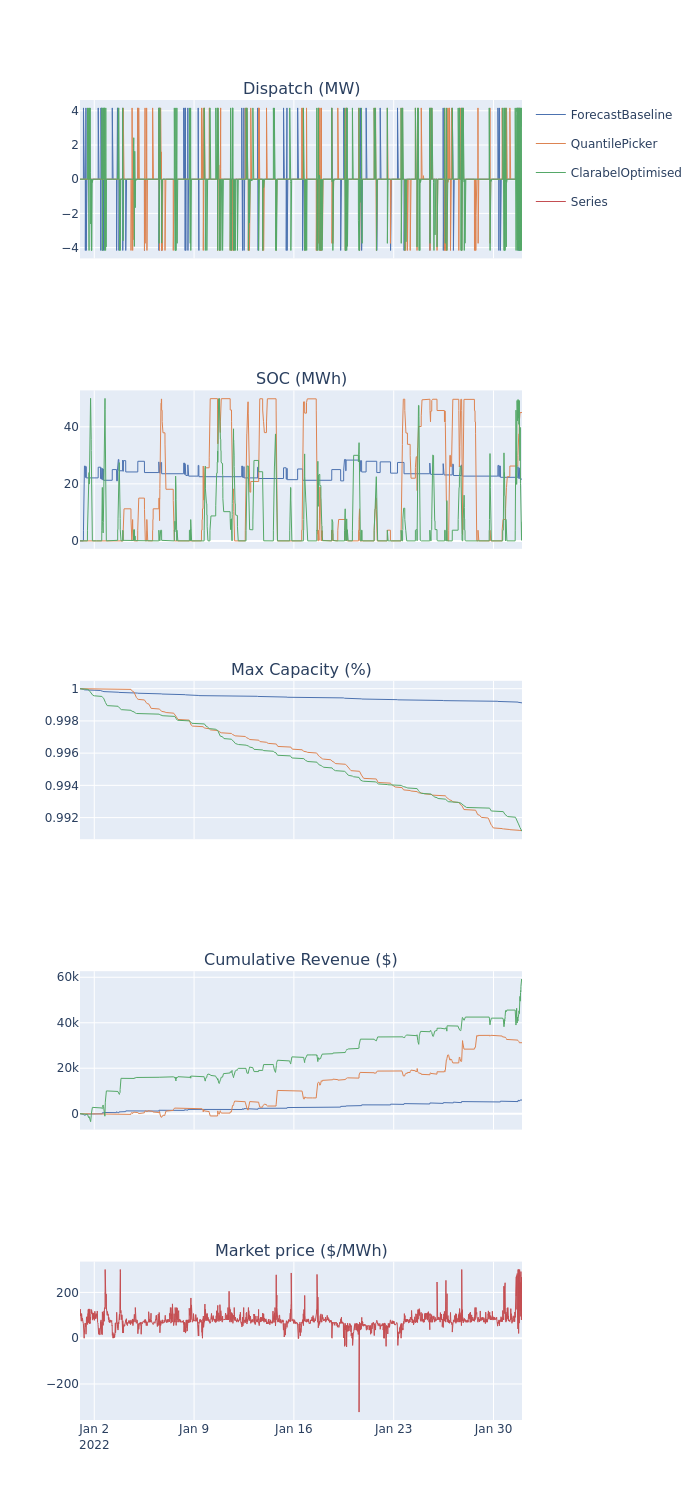

In [4]:
analysis.backtest_comparison(data, battery, results, resampler=False).show("png")